#### Importing Excel File to Python using Openpyxl
Source: https://www.datacamp.com/tutorial/python-excel-tutorial

In [ ]:
# Anaconda Prompt
conda activate ox
pip install Openpyxl

#### My Test Run

In [2]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.8.0'

In [63]:
# import nodes from excel file
import openpyxl 

wb = openpyxl.load_workbook('from_qgis.xlsx')
ws = wb['Coordinates']
nodes_list = [ws.cell(row=i,column=2).value for i in range(2,199+1)]
coordinates_list = [ws.cell(row=i,column=3).value for i in range(2,199+1)]
bus_stops = {nodes: coordinates for nodes, coordinates in zip(nodes_list, coordinates_list)}
print(bus_stops)

{'Monumento': '14.654455,120.983795', 'Malanday': '14.718282,120.957038', 'Mall of Asia': '14.535539,120.983720', 'PITX': '14.510395,120.992016', 'VGC': '14.711829,120.993211', 'North EDSA': '14.654670,121.029643', 'Fairview': '14.735339,121.060035', 'Quezon Ave': '14.641742,121.039311', 'Malaria': '14.769677,121.079772', 'Buendia': '14.554238,120.997071', 'Taft': '14.538141,121.000674', 'Northview': '14.684234,121.104832', 'Cubao': '14.621686,121.050018', 'Nangka': '14.669971,121.108374', 'Sta. Lucia Grandmall': '14.620197,121.099643', 'Gilmore': '14.613692,121.034162', 'D. Jose': '14.605315,120.981974', 'SM City East Ortigas': '14.588577,121.105247', 'Kalentong': '14.593758,121.026940', 'Pasig': '14.559793,121.080534', 'BGC': '14.548876,121.056359', 'Ayala': '14.549203,121.027902', 'Sucat': '14.453845,121.044929', 'Alabang': '14.415366,121.045285', 'SM Center Muntinlupa': '14.377987,121.046291', 'FTI-Taguig': '14.506545,121.035636', 'Victoneta Ave': '14.665638,120.984136', 'Marulas':

In [ ]:
# visualize nodes using GIS shapefile
# Source: https://www.linkedin.com/pulse/using-geopandas-display-shapefiles-jupyter-notebooks-andrew-cutts/

# first, install GeoPandas package
conda install geopandas

In [11]:
import geopandas as gpd

gdf = gpd.read_file('final_nodes_MM.shp')
print (gdf)

                       geometry
0    POINT (120.98385 14.65433)
1    POINT (120.98416 14.66561)
2    POINT (120.98145 14.67466)
3    POINT (120.97647 14.68567)
4    POINT (120.97468 14.68873)
..                          ...
193  POINT (121.01519 14.43095)
194  POINT (121.03081 14.42490)
195  POINT (121.05557 14.54046)
196  POINT (121.05635 14.52774)
197  POINT (121.05442 14.52292)

[198 rows x 1 columns]


<Axes: >

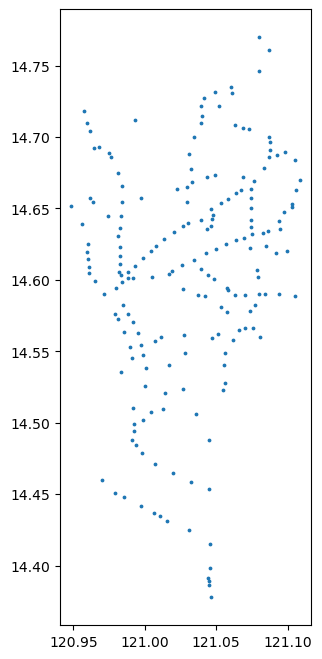

In [12]:
%matplotlib inline

# Source: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
gdf.plot(markersize=3.0, figsize=(12,8))

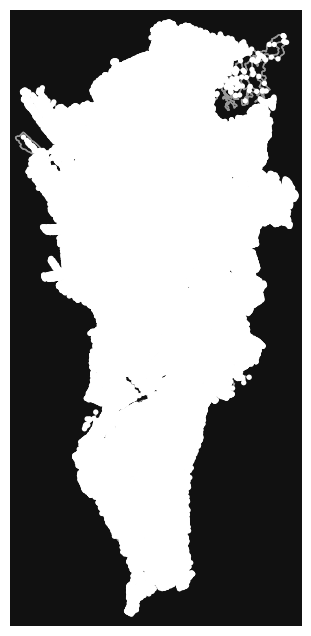

NameError: name 'plt' is not defined

In [13]:
# visualize nodes using OSMnx package in Python

from matplotlib import pyplot as plt

place = 'Metro Manila, Philippines'
graph = ox.graph_from_place(place)

# Plot the streets
fig, ax = ox.plot_graph(graph)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head()

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes.plot(ax=ax, facecolor='black', markersize=1.0)

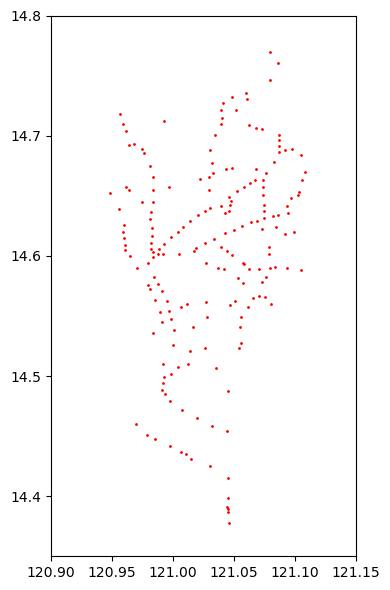

In [62]:
# visualize nodes using Excel file generated from QGIS

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [4,6]
plt.rcParams["figure.autolayout"] = True
plt.xlim(120.90, 121.15)
plt.ylim(14.35, 14.80)

for i in range(0,198):
    cxy = coordinates_list[i]
    separatexy = cxy.split(",")
    x = float(separatexy[1])
    y = float(separatexy[0])
    plt.plot(x, y, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")

plt.show()

In [27]:
# calculate time and distance of edges

# find the shortest path (by distance) between these nodes then plot it
orig = list(nodes_list)[0]
dest = list(nodes_list)[197]
route = ox.shortest_path(graph, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(graph, route, route_color="y", route_linewidth=6, node_size=0)

NodeNotFound: Either source M or target P is not in G

In [ ]:
# import barangay nodes and get the nearest bus node for each

In [ ]:
# determine the travel demand matrix

In [3]:
# using Matlab, determine the route set
# plot/visualize the resulting route set